### Manifold: t-SNE

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [62]:
sns.set(font_scale=0.8)

--------------

In [52]:
data = pd.read_csv('../datareader/finaldf.csv')
ndf = pd.DataFrame(index = data['phrase'])
score = ['CVA', 'IHD', 'CM', 'ARR', 'VD', 'CHD']
for scr in score :
    ndf[scr] = np.array(data[scr], dtype = float)

In [53]:
ndf.head()

,CVA,IHD,CM,ARR,VD,CHD
phrase,,,,,,
"1,25-dihydroxyvitamin_d(3)_24-hydroxylase,_mitochondrial",0.000000,0.446767,0.000000,0.000000,0.0,0.000000
"1,4-alpha-glucan-branching_enzyme",0.290414,0.000000,1.035505,0.091431,0.0,0.372223
"1,5-anhydro-d-fructose_reductase",0.000000,0.000000,0.000000,0.000000,0.0,2.220267
1-phosphatidylinositol_3-phosphate_5-kinase,0.000000,0.000000,0.000000,0.308680,0.0,0.317226
"1-phosphatidylinositol_4,5-bisphosphate_phosphodiesterase_beta-1",0.000000,0.000000,0.472116,0.000000,0.0,0.000000


-------------

In [54]:
tdata =ndf.copy(deep =True)

In [55]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    for item in val:
        if  item == col[0]:
            grp = 'navy'
        elif item == col[1]:
            grp = 'green'
        elif item == col[2]:
            grp = 'firebrick'
        elif item == col[3]:
            grp = 'mediumslateblue'
        elif item == col[4]:
            grp = 'darkgoldenrod'
        elif item == col[5]:
            grp = 'deepskyblue'
    clrs.append(grp)

In [56]:
from sklearn.manifold import TSNE

### 2D

In [57]:
X_embedded2d = TSNE(n_components=2).fit_transform(tdata)
X_embedded2d.shape

(3175, 2)

In [58]:
X_embedded2d[0:5]

array([[-37.206974, -19.815004],
       [-18.140862,  21.15462 ],
       [-24.3209  , -31.08383 ],
       [ 26.107746, -28.989954],
       [-37.626488,  18.23307 ]], dtype=float32)

In [59]:
X2d =[]
Y2d = []
for i in range(3175):
    X2d.append(X_embedded2d[i][0])
    Y2d.append(X_embedded2d[i][1])

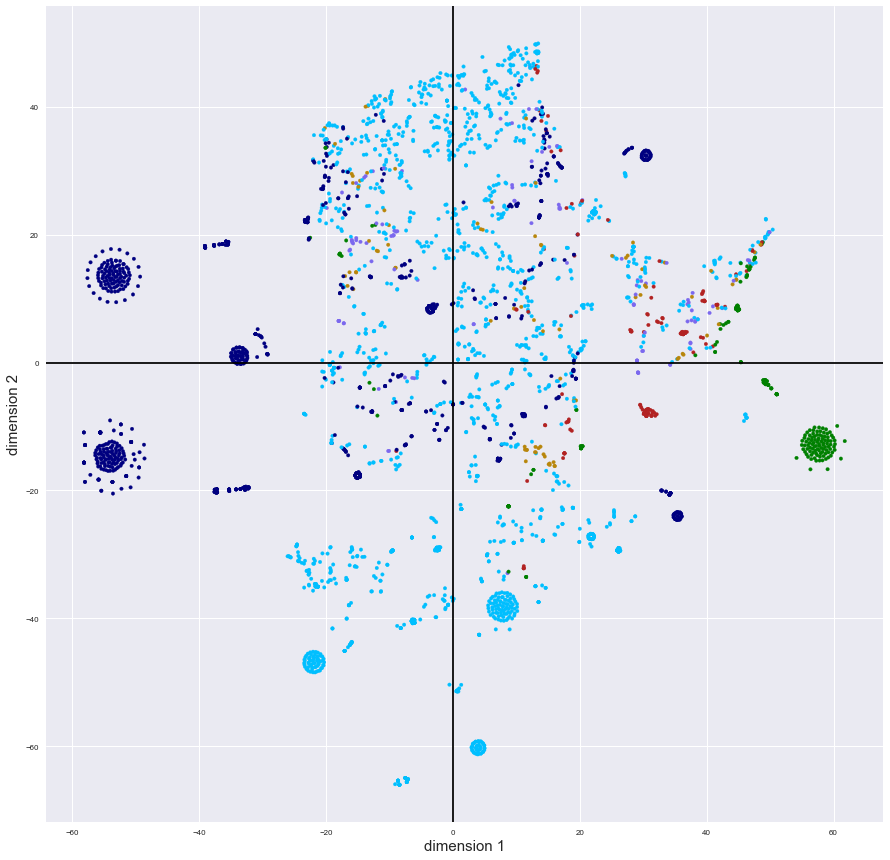

In [66]:
plt.figure(figsize = [15,15])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("dimension 1", fontsize=15)
plt.ylabel("dimension 2", fontsize=15)
plt.scatter(X2d,Y2d,color = clrs, marker ='.')
plt.savefig('tSNE2d.png')

### 3D

In [44]:
X_embedded3d = TSNE(n_components=3).fit_transform(tdata)
X_embedded3d.shape

(3175, 3)

In [45]:
X_embedded3d[0:5]

array([[ 14.83522   , -17.63237   ,  -2.2471092 ],
       [ -1.1052917 ,   9.756108  ,   2.9018748 ],
       [  4.5253997 ,  -8.5630045 , -12.304229  ],
       [  0.50430363, -10.390606  ,   0.6178836 ],
       [ -8.078426  ,   9.0385275 ,   8.676689  ]], dtype=float32)

In [46]:
X3d =[]
Y3d =[]
Z3d= []
for i in range(3175):
    X3d.append(X_embedded[i][0])
    Y3d.append(X_embedded[i][1])
    Z3d.append(X_embedded[i][2])

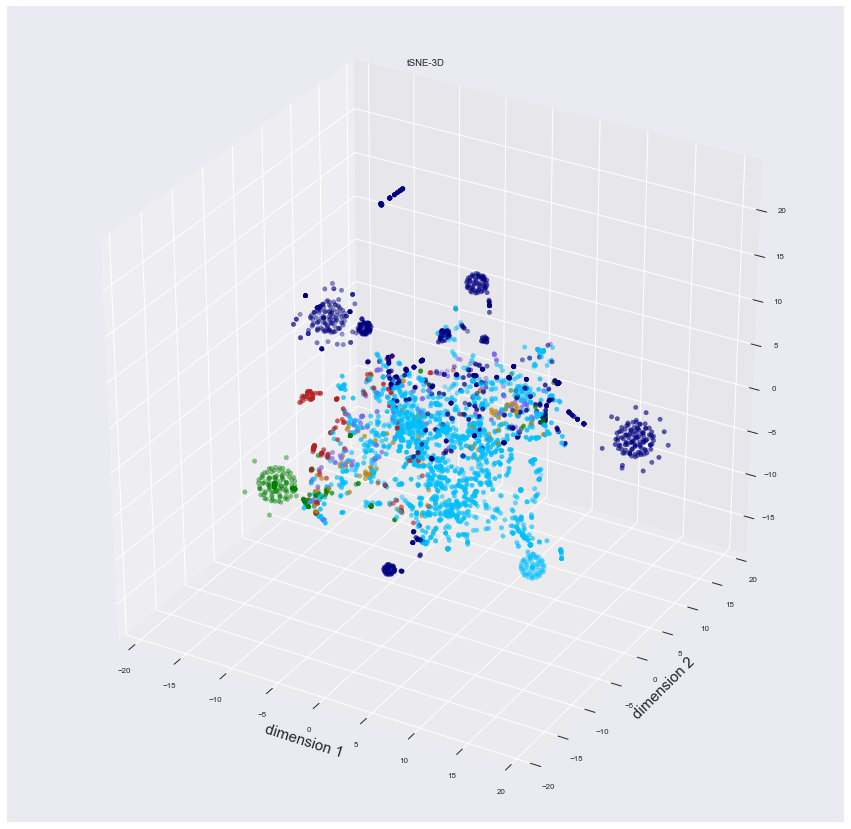

In [72]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 100

fig = plt.figure(figsize = [15,15])
ax = fig.gca(projection='3d')
plt.title('tSNE-3D')

ax.scatter(X3d, Y3d, Z3d, label='tSNE', s=20, color=clrs)
plt.xlabel("dimension 1", fontsize=15)
plt.ylabel("dimension 2", fontsize=15)
plt.savefig('tSNE3d.png')

In [49]:
 TSNE(n_components=3).get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'perplexity': 30.0,
 'random_state': None,
 'verbose': 0}